In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

Fabric Classificaiton

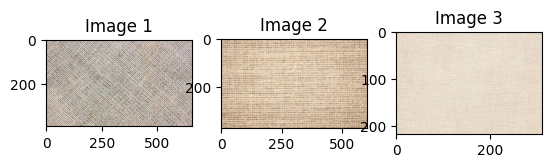

In [4]:
#Open image files with cv2
img1 = cv2.imread('demo2_images/woven1.jpg')
img2 = cv2.imread('demo2_images/woven2.jpg')
img3 = cv2.imread('demo2_images/woven3.jpg')

# Display 3 images side by side 
plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('Image 1')
plt.subplot(132),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('Image 2')
plt.subplot(133),plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.title('Image 3')
plt.show()

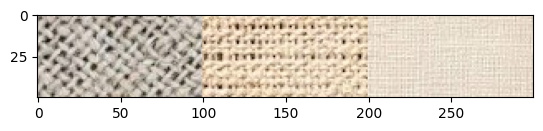

In [12]:
# Crop out a 100x50 region of interest from each image
img1_crop = img1[100:150, 100:200]
img2_crop = img2[100:150, 100:200]
img3_crop = img3[100:150, 100:200]

# Create a new image by concatenating the 3 cropped images horizontally
img_concat = cv2.hconcat([img1_crop, img2_crop, img3_crop])

# Display the concatenated image
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Create a directory inside demo2_images gabor_output
os.makedirs('demo2_images/gabor_output', exist_ok=True)


In [ ]:
# Convert img_concat to grayscale
img_concat_gray = cv2.cvtColor(img_concat, cv2.COLOR_BGR2GRAY)

# Define the gabor filter bank
kernels = []
params = []
for theta in range(4):
    theta_val = theta / 4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi / 4):
            for gamma in (0.05, 0.5):
                kernel = cv2.getGaborKernel((21, 21), sigma, theta_val, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernel /= 1.5 * kernel.sum()
                kernels.append(kernel)
                params.append((theta_val, sigma, lamda, gamma))

# Apply the gabor filter bank to the image
filtered = []
for kernel in kernels:
    filtered.append(cv2.filter2D(img_concat_gray, cv2.CV_8UC3, kernel))

# Ensure the output directory exists
output_dir = 'demo2_images/gabor_output'
os.makedirs(output_dir, exist_ok=True)

# Save the filtered images with parameter descriptions in the file name
for i, (img, param) in enumerate(zip(filtered, params)):
    theta_val, sigma, lamda, gamma = param
    filename = f'gabor_theta{theta_val:.2f}_sigma{sigma}_lambda{lamda:.2f}_gamma{gamma:.2f}.jpg'
    filepath = os.path.join(output_dir, filename)
    cv2.imwrite(filepath, img)

In [ ]:
# Create a  11x11 gabor kernel
kernel = cv2.getGaborKernel((11, 11), 3, np.pi/4, np.pi/4, 0.5, 0, ktype=cv2.CV_32F)


